Visual analysis of COGLOAD experiments data.

In [143]:
import psycopg2
import sys
import datetime
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as dates
import numpy as np

In [280]:
# Reset the whole process - taskIds start from zero
dsn_database = "veljkodb"
dsn_hostname = "127.0.0.1"
dsn_port = "5432"
dsn_uid = "veljkopg"     
dsn_pwd = "pntdcn15"

user_id = "tn4vl" # CHANGE USER ID HERE! NOTE: "7yvd4" WAS USED FOR TESTING, SO THAT ID SHOULD PROBABLY BE AVOIDED

In [198]:
# CHANGE YOUR DB PARAMETERS HERE
try:
    conn_string = "host="+dsn_hostname+" port="+dsn_port+" dbname="+dsn_database+" user="+dsn_uid+" password="+dsn_pwd
    print "Connecting to database\n  ->%s" % (conn_string)
    conn=psycopg2.connect(conn_string)
    print "Connected!\n"
except:
    print "Unable to connect to the database."

Connecting to database
  ->host=127.0.0.1 port=5432 dbname=veljkodb user=veljkopg password=pntdcn15
Connected!



In [281]:
cursor = conn.cursor()
cursor.execute("""SELECT timestamp,hr,rr,gsr from iotdata23 WHERE client_id=(%s)""", (user_id,))
df_iot = DataFrame(cursor.fetchall(), columns=['timestamp', 'hr','rr','gsr'] )
df_iot=df_iot.set_index(['timestamp'])
df_iot.index = pd.to_datetime(df_iot.index, unit='ms')

cursor.execute("""SELECT timestamp,opacity from secondary_task WHERE client_id=(%s)""", (user_id,))
df_sec = DataFrame(cursor.fetchall(), columns=['timestamp', 'opacity'] )
df_sec=df_sec.set_index(['timestamp'])
df_sec.index = pd.to_datetime(df_sec.index, unit='ms')

cursor.execute("""SELECT time_start, time_end, label, task_load_index from primary_task WHERE client_id=(%s)""", (user_id,))
df_prim = DataFrame(cursor.fetchall(), columns=['time_start', 'time_end', 'label','task_load_index'] )
df_prim=df_prim.set_index(['time_start'])
df_prim.index = pd.to_datetime(df_prim.index, unit='ms')
df_prim.time_end = pd.to_datetime(df_prim.time_end, unit='ms')

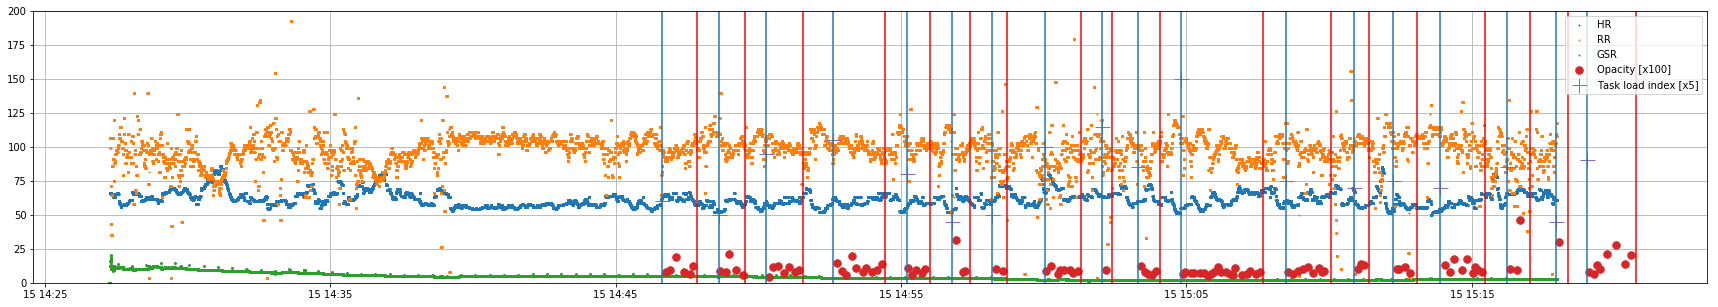

In [282]:
fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(111)

ax.plot(df_iot.hr, label='HR', linewidth=0.0, linestyle='-', marker='.', markersize=2)
ax.plot(df_iot.rr*100, label='RR', linewidth=0.0, linestyle='-', marker='.', markersize=2)
ax.plot(df_iot.gsr/200.0, label='GSR', linewidth=0.0, linestyle='-', marker='.', markersize=2)

ax.plot(df_sec.opacity*100, label='Opacity [x100]', linewidth=0.0, linestyle='-', marker='.', markersize=15)
ax.plot(df_prim.task_load_index*5, label='Task load index [x5]', linewidth=0.0, linestyle='-', marker='+', markersize=15)

xposition = df_prim.index.values
for xc in xposition:
    ax.axvline(x=xc)

xposition = df_prim.time_end.values
for xc in xposition:
    ax.axvline(x=xc, color='r',)

ax.set_ylim(0, 200)


#ax.set_xlim([datetime.datetime(2017, 8, 20,17,0), datetime.datetime(2017, 8, 20,17, 30)])

plt.legend()
plt.grid()
plt.show()

In [196]:
conn.close()